In [80]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This file cleans android and ios by removing outlier values for eventGPSSignalStrength, eventStartSpeed, eventEndSpeed. It creates a new feature called aggressive which indicates the row shows aggressive driving based on 

In [81]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

iOS_raw = pd.read_csv(root / "data" / "raw" / "ios_turns.csv", header=0)
android_raw = pd.read_csv(root / "data" / "raw" / "android_turns.csv", header=0)

In [82]:
android_raw.shape

(1287, 34)

In [83]:
iOS_raw.shape

(61094, 34)

# Dropping irrelevent features (explanation in Notion)
android_raw = android_raw.drop(['eventAction', 'eventSpeedChange', 'payloadCreation',
     'validity_mean', 'init_time', 'eventStart', 'eventEnd', 'eventStartLatitude',
     'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude'],
    axis=1
)

In [84]:
android_raw.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.172144e+08,1,1,670340.75,677584.90,4,10.394929,7.244125,0.016991,41.774303,...,0.738191,0.800598,0.854956,8.662511,9.521707,67.59688,69.319600,22.941639,20.335337,1
1,1.172144e+08,1,1,250180.31,257678.03,4,9.401910,7.497719,0.016103,41.802270,...,0.926223,1.051501,1.147173,9.708605,11.245602,80.07132,84.723694,20.737572,21.819538,1
2,1.122337e+09,1,1,852694.94,860628.70,4,6.750588,7.933750,0.012202,41.822826,...,1.197002,1.415529,1.806123,20.356073,2.534807,249.20390,20.211075,18.100092,8.500866,1
3,1.122337e+09,1,1,778673.60,783632.25,5,10.084871,4.958625,0.014104,41.822826,...,1.343501,2.203393,4.873099,16.093168,4.245962,162.20609,21.221228,20.195393,14.847904,1
4,1.122337e+09,1,1,711669.90,716628.94,4,5.592350,4.959063,0.009630,41.822876,...,2.485116,2.862883,3.406215,29.804018,1.212521,295.70374,6.061072,209.791600,3.592705,1


In [85]:
iOS_raw.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.713042e+12,1.0,1.0,479553.47,484875.20,4.0,8.553064,5.321719,0.014196,41.966473,...,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279,1.0
1,1.713042e+12,1.0,1.0,459179.94,464064.80,4.0,9.360758,4.884875,0.012575,41.966442,...,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140,1.0
2,1.713042e+12,1.0,1.0,448020.16,456677.90,5.0,10.681455,8.657750,0.021795,41.966310,...,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355,1.0
3,1.713042e+12,1.0,1.0,427011.25,434835.00,5.0,10.399240,7.823751,0.016130,41.966670,...,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf,1.0
4,1.713042e+12,1.0,1.0,395398.60,402547.22,4.0,8.345368,7.148625,0.017785,41.968548,...,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477,1.0


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_27587/1467067716.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


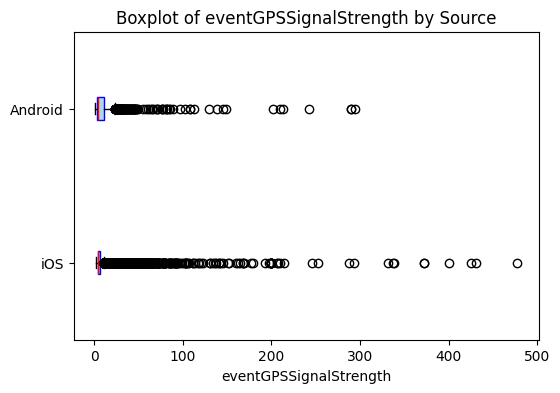

In [86]:
# Analyze eventGPSSignalStrength for Android
plt.figure(figsize=(6,4))
android_data = android_raw['eventGPSSignalStrength']
ios_data = iOS_raw['eventGPSSignalStrength']

plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.show()


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_27587/2336716558.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_filtered['eventGPSSignalStrength'], android_filtered['eventGPSSignalStrength']],


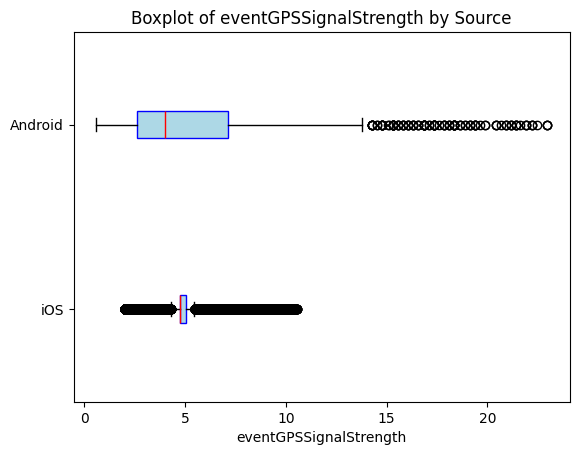

In [87]:
# drop columns with too weak of a signal

# Apply IQR filter 
def filter_by_gps_signal(df_raw, col="eventGPSSignalStrength"):
    s = df_raw[col].dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    mask = df_raw[col].notna() & (df_raw[col] <= upper) & (df_raw[col] >= 0)
    return df_raw[mask].copy(), upper

android_filtered, android_upper = filter_by_gps_signal(android_raw)
ios_filtered, ios_upper = filter_by_gps_signal(iOS_raw)

plt.boxplot([ios_filtered['eventGPSSignalStrength'], android_filtered['eventGPSSignalStrength']],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.show()


In [88]:
android_filtered.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.172144e+08,1,1,670340.750,677584.900,4,10.394929,7.244125,0.016991,41.774303,...,0.738191,0.800598,0.854956,8.662511,9.521707,67.596880,69.319600,22.941639,20.335337,1
1,1.172144e+08,1,1,250180.310,257678.030,4,9.401910,7.497719,0.016103,41.802270,...,0.926223,1.051501,1.147173,9.708605,11.245602,80.071320,84.723694,20.737572,21.819538,1
6,1.122337e+09,1,1,604877.000,609121.560,5,11.290954,4.244563,0.008359,41.822420,...,1.083567,1.494703,1.494703,11.732657,24.616348,44.000920,105.462135,18.996666,29.467962,1
8,1.122337e+09,1,1,284234.220,287407.720,5,12.743101,3.173500,0.007654,41.817780,...,1.748773,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,1
12,1.122337e+09,1,1,37649.457,43639.777,5,8.986107,5.990321,0.013587,41.802822,...,0.266539,1.698927,2.619599,11.501888,2.787075,74.401410,16.806042,91.713660,12.708904,1


In [89]:
ios_filtered.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.713042e+12,1.0,1.0,479553.47,484875.20,4.0,8.553064,5.321719,0.014196,41.966473,...,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279,1.0
1,1.713042e+12,1.0,1.0,459179.94,464064.80,4.0,9.360758,4.884875,0.012575,41.966442,...,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140,1.0
2,1.713042e+12,1.0,1.0,448020.16,456677.90,5.0,10.681455,8.657750,0.021795,41.966310,...,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355,1.0
3,1.713042e+12,1.0,1.0,427011.25,434835.00,5.0,10.399240,7.823751,0.016130,41.966670,...,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf,1.0
4,1.713042e+12,1.0,1.0,395398.60,402547.22,4.0,8.345368,7.148625,0.017785,41.968548,...,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477,1.0


In [90]:
print(android_filtered.shape[0] / android_raw.shape[0] * 100, "% of android data retained after IQR filtering")
print(ios_filtered.shape[0] / iOS_raw.shape[0] * 100, "% of ios data retained after IQR filtering")
android_df = android_filtered.copy()
ios_df = ios_filtered.copy()
del android_filtered
del ios_filtered

89.1996891996892 % of android data retained after IQR filtering
91.10878318656496 % of ios data retained after IQR filtering


In [91]:
android_df["eventGPSSignalStrength"].describe()

count    1148.000000
mean        5.905655
std         5.015432
min         0.590333
25%         2.625184
50%         3.984147
75%         7.142857
max        22.959183
Name: eventGPSSignalStrength, dtype: float64

In [92]:
ios_df["eventGPSSignalStrength"].describe()

count    55662.000000
mean         5.518636
std          1.974436
min          2.000000
25%          4.739321
50%          4.747437
75%          5.031525
max         10.535765
Name: eventGPSSignalStrength, dtype: float64

In [94]:
android_df["eventStartSpeed"].describe()

count    1148.000000
mean       13.930049
std         8.691971
min         0.153224
25%         8.031878
50%        11.855412
75%        17.051075
max        55.186930
Name: eventStartSpeed, dtype: float64

In [95]:
ios_df["eventStartSpeed"].describe()

count    55662.000000
mean        15.372087
std         13.426513
min         -2.236940
25%          8.314723
50%         13.624814
75%         20.138674
max        578.636600
Name: eventStartSpeed, dtype: float64

In [96]:
ios_df = ios_df[~((ios_df["eventStartSpeed"] < 0) | (ios_df["eventStartSpeed"] > 200))]
ios_df["eventStartSpeed"].describe()

count    55639.000000
mean        15.180916
std          9.297290
min          0.000000
25%          8.314043
50%         13.620105
75%         20.138674
max        101.549355
Name: eventStartSpeed, dtype: float64

In [97]:
ios_df["eventEndSpeed"].describe()

count    55639.000000
mean        16.985755
std          8.095749
min         -2.236940
25%         11.419626
50%         15.769236
75%         20.973166
max        101.888290
Name: eventEndSpeed, dtype: float64

In [98]:
android_df["eventEndSpeed"].describe()

count    1148.000000
mean       16.849707
std         8.249606
min         0.022369
25%        11.913225
50%        16.041231
75%        20.399112
max        54.742170
Name: eventEndSpeed, dtype: float64

In [99]:
ios_df = ios_df[~((ios_df["eventEndSpeed"] < 0))]
ios_df["eventEndSpeed"].describe()

count    55636.000000
mean        16.986791
std          8.094737
min          0.000000
25%         11.419958
50%         15.769908
75%         20.973387
max        101.888290
Name: eventEndSpeed, dtype: float64

In [ ]:
# to find aggressive driving patterns
ios_df["speed_gap"] = (ios_df["eventEndSpeed"] - ios_df["eventStartSpeed"])
ios_df[
    ((ios_df["speed_gap"] > 15) & (ios_df["eventDurationSeconds"] < 2)) |
    ((ios_df["speed_gap"] < -30) & (ios_df["eventDurationSeconds"] < 2))
]

In [ ]:
# to find aggressive driving patterns
android_df["speed_gap"] = (android_df["eventEndSpeed"] - android_df["eventStartSpeed"])
android_df[
    ((android_df["speed_gap"] > 15) & (android_df["eventDurationSeconds"] < 2)) |
    ((android_df["speed_gap"] < -30) & (android_df["eventDurationSeconds"] < 2))
]

In [ ]:
df["aggressive"] = (
    ((df["speed_gap"] > 15) & (df["eventDurationSeconds"] < 2)) |
    ((df["speed_gap"] < -30) & (df["eventDurationSeconds"] < 2))
).astype(int) # 1 if aggressive, 0 otherwise
df["aggressive"].value_counts()

In [ ]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df[df['is_ios'] == 1]['eventSampleSpeed']
android_data = df[df['is_ios'] == 0]['eventSampleSpeed']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventSampleSpeed by Source")
plt.xlabel("eventSampleSpeed")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventSampleSpeed", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventSampleSpeed by Source (Percent within Source)")
plt.xlabel("eventSampleSpeed")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
df['eventDurationSeconds'].describe()

In [ ]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df[df['is_ios'] == 1]['eventDurationSeconds']
android_data = df[df['is_ios'] == 0]['eventDurationSeconds']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventDurationSeconds by Source")
plt.xlabel("eventDurationSeconds")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventDurationSeconds", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventDurationSeconds by Source (Percent within Source)")
plt.xlabel("eventDurationSeconds")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
df[df['eventDurationSeconds'] > 20].shape

In [ ]:
df['eventMilesDriven'].describe()

In [ ]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df[df['is_ios'] == 1]['eventMilesDriven']
android_data = df[df['is_ios'] == 0]['eventMilesDriven']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventMilesDriven by Source")
plt.xlabel("eventMilesDriven")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventMilesDriven", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventMilesDriven by Source (Percent within Source)")
plt.xlabel("eventMilesDriven")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
print(df.shape[0] / df_raw_size * 100, "% of data retained after cleaning")

In [ ]:
ios_clean = df[df["is_ios"] == 1]
android_clean = df[df["is_ios"] == 0]

In [ ]:
# saving into cleaned csv file
ios_clean.to_csv(root / "data" / "processed" / "ios"/ "parent_clean.csv", index=False)
android_clean.to_csv(root / "data" / "processed" / "android"/ "parent_clean.csv", index=False)  
df.to_csv(root / "data" / "processed" / "merged"/ "parent_clean.csv", index=False) 

In [ ]:
# YIPPEE!!!